# Position

In order to see the modifications of the model caused by the changes in the different parameters, feel free to play with the sliders:

## Test the parameters

-----------------------------

{'values_fit': {'dir_target': 1.0, 'start_anti': 443.00000000519873, 'a_anti': 0.9540933542959635, 'latency': 1101.5419019252379, 'steady_state': 14.92768758657037, 'do_whitening': False, 'tau': 13.000000045309564}, 'FitStatistics': {'nfev': 621, 'chisqr': 39.723001652930854, 'redchi': 0.028112527709080577, 'aic': -5059.452522045068, 'bic': -5033.167508509608}, 'fit': array([ 0.,  0.,  0., ..., nan, nan, nan])}


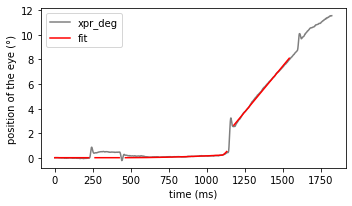

In [1]:
import ANEMO

Processing = ANEMO.ProcessingSmoothPursuit(dirpath='dataANEMO', sub='002')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'xpr_deg' # The position x of the eye in degrees
trial = 8 # Number of the trial to be transformed
expname = 'sub-002_task-aSPEM' # Name of the particular experience to be
                               # transformed
                               # or list(PreProcessing.data.keys())[0]
model = ANEMO.Model.SmoothPursuit.position # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.SmoothPursuit
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(xNanName='px_NaN',
                           eventName_TargetOn='TargetOn',
                           eventName_StimulusOff='StimulusOff',
                           eventName_dir_target='dir_target',
                           do_whitening=False) 
toxname = None # Name of the data to be saved
return_ = True # If True returns the value, else saves it in results and data

#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Fit = Processing.Trial.Fit(xname,
                           trial,
                           expname,
                           model,
                           generate_params,
                           stime,
                           etime,
                           step_fit,
                           arg_generate_params,
                           toxname,
                           return_)
print(Fit)

#------------------------------------------------------------------------------
# to retrieve the raw data:
#------------------------------------------------------------------------------
data_exp = Processing.data[expname]
data = data_exp.Data
xpr_deg = data[data.trial==trial][xname].values

#------------------------------------------------------------------------------
# Plot:
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(10/2, 10/(1.681*2)))

axs.plot(xpr_deg, 'k', alpha=.5, label='xpr_deg')
axs.plot(Fit['fit'], 'r', label='fit')
axs.set_xlabel('time (ms)')
axs.set_ylabel('position of the eye (°)')
axs.legend()

plt.tight_layout()
plt.show()

## Run it on a data set

----------------------------

In [2]:
import ANEMO

Processing = ANEMO.ProcessingSmoothPursuit(dirpath='dataANEMO', sub='002')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'xpr_deg' # The position x of the eye in degrees
model = ANEMO.Model.SmoothPursuit.position # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.SmoothPursuit
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(xNanName='px_NaN',
                           eventName_TargetOn='TargetOn',
                           eventName_StimulusOff='StimulusOff',
                           eventName_dir_target='dir_target',
                           do_whitening=False) 
toxname = None # Name of the data to be saved
expnames = 'sub-002_task-aSPEM' # Name of the particular experience to be
                                # transformed
                                # or list(PreProcessing.data.keys())[0] 
trials = trials = list(range(1, 16)) # List of the trial to be transformed
recalculate = False # Allows you to indicate if you want to force the
                    # calculation on the trials already processed
    
#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Processing.Data.Fit(xname,
                    model,
                    generate_params,
                    stime,
                    etime,
                    step_fit,
                    arg_generate_params,
                    toxname,
                    expnames,
                    trials,
                    recalculate)

calculates Fit_position from the file sub-002_task-aSPEM... finished
